# Customer Personality Analysis
**Analysis of company's ideal customers by [Raqib](https://raqibcodes.me/)**

Visit my Github [here](https://github.com/Abdulraqib20) to see more of my projects!

## Context 
### Problem Statement
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content
### Attributes

#### People
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target
Need to perform clustering to summarize customer segments.

In [232]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings('ignore')

In [162]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [164]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [165]:
df = df.dropna()
df.isnull().sum().any()
print('There are no null values left')

There are no null values left


In [166]:
# frequencies of categorical columns
cat_cols = df.select_dtypes(include='object').columns
for i, col in enumerate(cat_cols):
    print('Value counts for {}: '.format(col))
    print(df[col].value_counts())
    if i < len(cat_cols) - 1:
        print('-' * 100)

Value counts for Education: 
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
Value counts for Marital_Status: 
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
Value counts for Dt_Customer: 
31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
20-08-2013    10
              ..
05-08-2012     1
18-11-2012     1
09-05-2014     1
26-06-2013     1
09-01-2014     1
Name: Dt_Customer, Length: 662, dtype: int64


## Feature Engineering

In [167]:
# customer age
df['Age'] = datetime.datetime.now().year - df['Year_Birth']

# total spending
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Total_Spending'] = df[spending_cols].sum(axis=1)

# total number of individuals in each customer's household
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 1

# total number of campaigns accepted by each customer
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Total_Acceptance'] = df[campaign_cols].sum(axis=1)

# number of days since each customer's enrollment with the company until the current date
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['days_of_enrollment'] = (datetime.datetime.now() - df['Dt_Customer']).dt.days

# most frequent purchasing channel
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['Purchasing_Channel'] = df[purchase_cols].idxmax(axis=1).str.replace('Num', '')

# total purchases
total_purchases_col = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases']
df['Total_Purchases'] = df[total_purchases_col].sum(axis=1)

# website activity
website_cols = ['NumWebPurchases', 'NumWebVisitsMonth']
df['Website_Activity'] = df[website_cols].sum(axis=1)

# total number of campaigns responded to by each customer
response_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['Campaign_Response'] = df[response_cols].sum(axis=1)

# marital status new
df['Marital_Status_New'] = df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'No_Partner',
    'Divorced': 'No_Partner',
    'Widow': 'No_Partner',
    'Alone': 'No_Partner',
    'Absurd': 'No_Partner',
    'YOLO': 'No_Partner'
})

# education level
df['Education_Level'] = df['Education'].replace({
    'Graduation': 'Graduate',
    'PhD': 'Post_Graduate',
    'Master': 'Post_Graduate',
    '2n Cycle': 'Undergraduate',
    'Basic': 'Undergraduate'
})

# parental status
df['Parent'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)

# dropping redundant columns
df = df.drop([
    'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Dt_Customer',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Response', 'Marital_Status', 'Education',
    'Z_CostContact', 'Z_Revenue', 'NumWebVisitsMonth', 'NumDealsPurchases'
], axis=1)

In [168]:
df.sample(10)

,ID,Income,Recency,Complain,Age,Total_Spending,Family_Size,Total_Acceptance,days_of_enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent
883,8017,51111.0,83,0,42,55,3,0,3274,StorePurchases,7,8,0,Partner,Undergraduate,1
1287,2516,46831.0,84,0,54,78,3,0,3591,CatalogPurchases,7,5,0,Partner,Undergraduate,1
421,3129,30096.0,30,0,40,45,2,0,3302,StorePurchases,6,8,0,Partner,Graduate,1
820,9493,76412.0,15,0,43,1808,1,2,3684,StorePurchases,18,8,3,No_Partner,Post_Graduate,0
1570,4261,82800.0,23,0,77,1315,1,2,3846,StorePurchases,26,10,3,No_Partner,Post_Graduate,0
1136,10542,36778.0,63,0,55,77,3,0,4046,WebPurchases,9,12,0,Partner,Post_Graduate,1
1718,10640,44392.0,71,0,49,211,3,0,3680,WebPurchases,14,11,0,Partner,Graduate,1
578,10242,47472.0,39,0,57,75,3,0,3550,StorePurchases,8,7,0,Partner,Post_Graduate,1
1037,67,46423.0,6,0,51,92,3,0,3548,StorePurchases,9,9,0,No_Partner,Post_Graduate,1
1727,1744,23529.0,67,0,58,54,2,0,3627,StorePurchases,5,7,0,No_Partner,Undergraduate,1


In [169]:
df.describe()

,ID,Income,Recency,Complain,Age,Total_Spending,Family_Size,Total_Acceptance,days_of_enrollment,Total_Purchases,Website_Activity,Campaign_Response,Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,0.009477,54.179603,607.075361,1.947202,0.298285,3616.006318,14.880866,9.404332,0.448556,0.714350
std,3249.376275,25173.076661,28.948352,0.096907,11.985554,602.900476,0.749062,0.679209,232.469034,7.670957,3.565683,0.892440,0.451825
min,0.000000,1730.000000,0.000000,0.000000,27.000000,5.000000,1.000000,0.000000,3104.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,35303.000000,24.000000,0.000000,46.000000,69.000000,1.000000,0.000000,3444.000000,8.000000,7.000000,0.000000,0.000000
50%,5458.500000,51381.500000,49.000000,0.000000,53.000000,396.500000,2.000000,0.000000,3617.000000,15.000000,9.000000,0.000000,1.000000
75%,8421.750000,68522.000000,74.000000,0.000000,64.000000,1048.000000,2.000000,0.000000,3790.000000,21.000000,11.000000,1.000000,1.000000
max,11191.000000,666666.000000,99.000000,1.000000,130.000000,2525.000000,4.000000,4.000000,4167.000000,44.000000,28.000000,5.000000,1.000000


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2216 non-null   int64  
 1   Income              2216 non-null   float64
 2   Recency             2216 non-null   int64  
 3   Complain            2216 non-null   int64  
 4   Age                 2216 non-null   int64  
 5   Total_Spending      2216 non-null   int64  
 6   Family_Size         2216 non-null   int64  
 7   Total_Acceptance    2216 non-null   int64  
 8   days_of_enrollment  2216 non-null   int64  
 9   Purchasing_Channel  2216 non-null   object 
 10  Total_Purchases     2216 non-null   int64  
 11  Website_Activity    2216 non-null   int64  
 12  Campaign_Response   2216 non-null   int64  
 13  Marital_Status_New  2216 non-null   object 
 14  Education_Level     2216 non-null   object 
 15  Parent              2216 non-null   int32  
dtypes: flo

## Exploratory Data Analysis

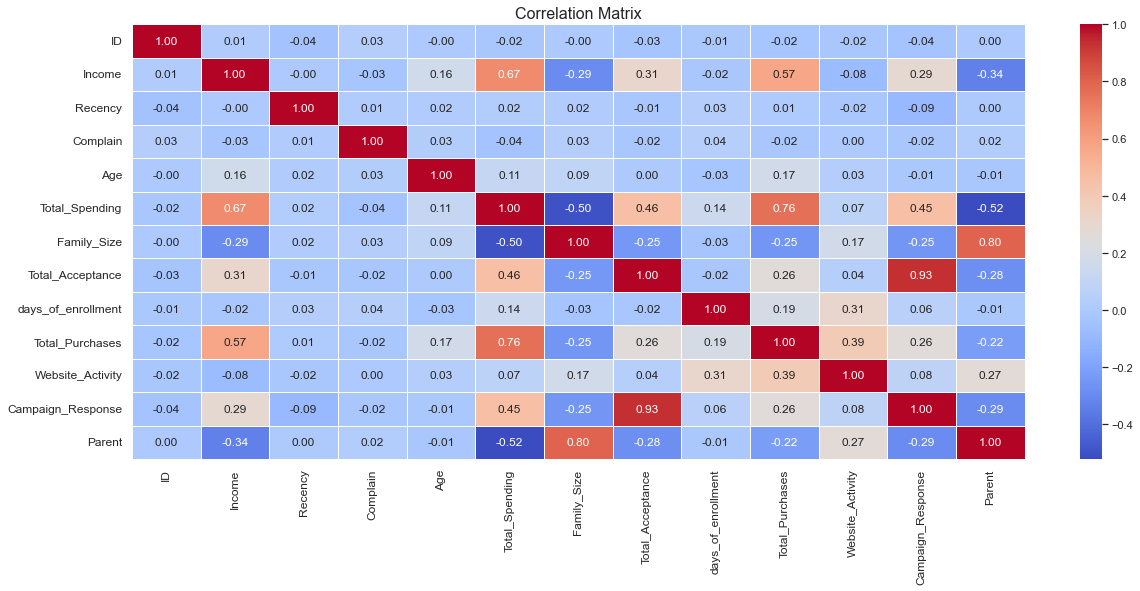

In [171]:
corr = df.corr()
plt.figure(figsize=[20, 8])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

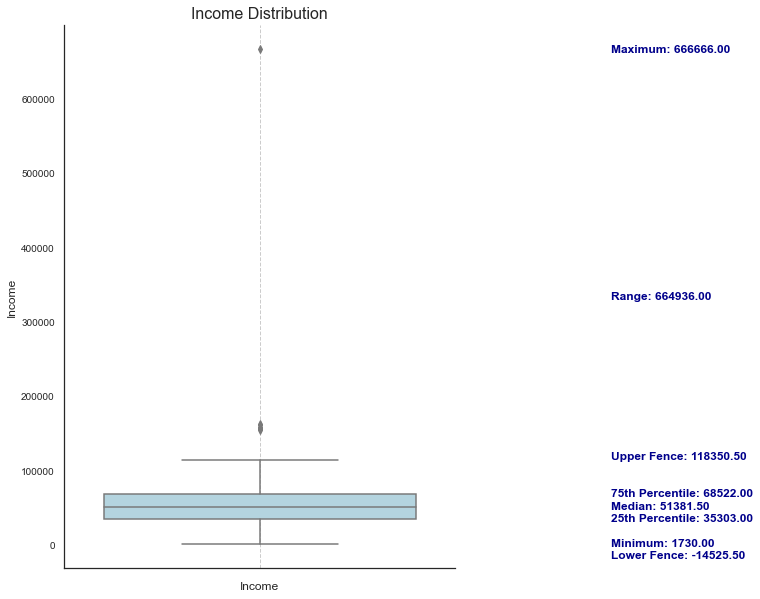

In [172]:
# income dist
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Income'], color='lightblue', linewidth=1.5)

age_stats = df['Income'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_income = df[(df['Income'] < q1 - 1.5 * iqr) | (df['Income'] > q3 + 1.5 * iqr)]['Income']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

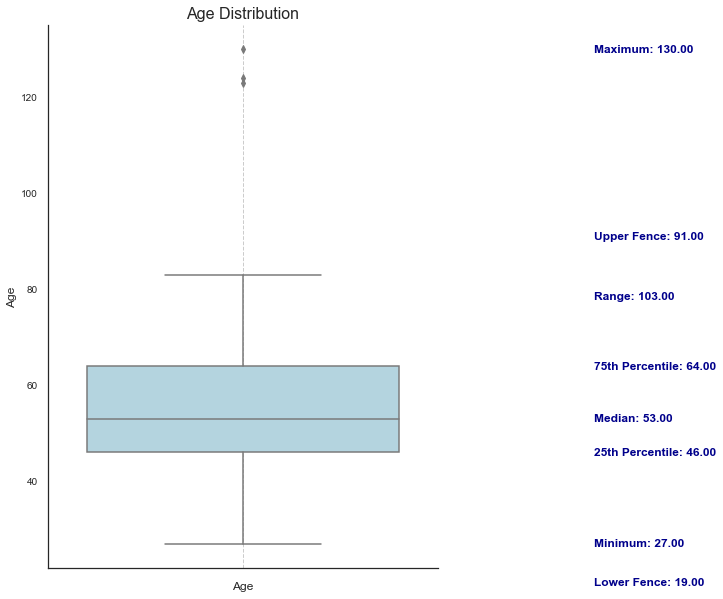

In [173]:
# age dist
plt.figure(figsize=[7, 10])
sns.boxplot(y=df['Age'], color='lightblue', linewidth=1.5)

age_stats = df['Age'].describe()
q1 = age_stats['25%']
q3 = age_stats['75%']
median = age_stats['50%']
min_val = age_stats['min']
max_val = age_stats['max']
range_val = max_val - min_val

iqr = q3 - q1
outliers_age = df[(df['Age'] < q1 - 1.5 * iqr) | (df['Age'] > q3 + 1.5 * iqr)]['Age']

plt.text(0.9, q1, f'25th Percentile: {q1:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, median, f'Median: {median:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, q3, f'75th Percentile: {q3:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val, f'Minimum: {min_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, max_val, f'Maximum: {max_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
plt.text(0.9, min_val + (range_val / 2), f'Range: {range_val:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

lower_fence = q1 - 1.5 * iqr
plt.text(0.9, lower_fence, f'Lower Fence: {lower_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')
upper_fence = q3 + 1.5 * iqr
plt.text(0.9, upper_fence, f'Upper Fence: {upper_fence:.2f}', va='center', ha='left', color='darkblue', fontweight='bold')

plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
sns.despine()
plt.show();

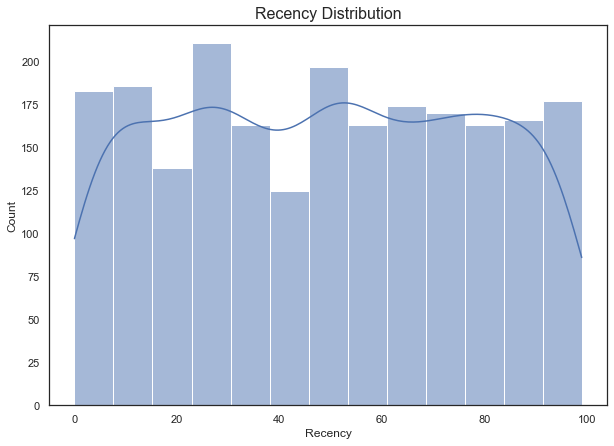

In [174]:
# recency distribution
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Recency', kde=True)
plt.title('Recency Distribution', fontsize=16)
plt.show();

<Figure size 720x504 with 0 Axes>

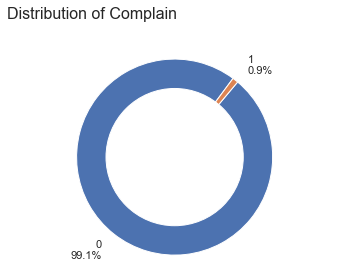

In [175]:
# complain distribution
plt.figure(figsize=[10, 7])
counts = df['Complain'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Complain', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

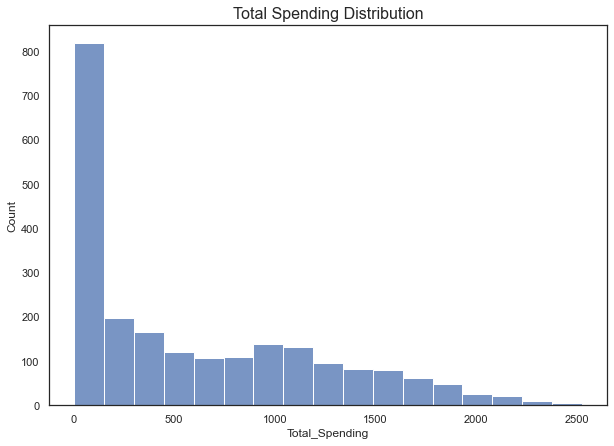

In [176]:
# total spending
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Spending')
plt.title('Total Spending Distribution', fontsize=16)
plt.show();

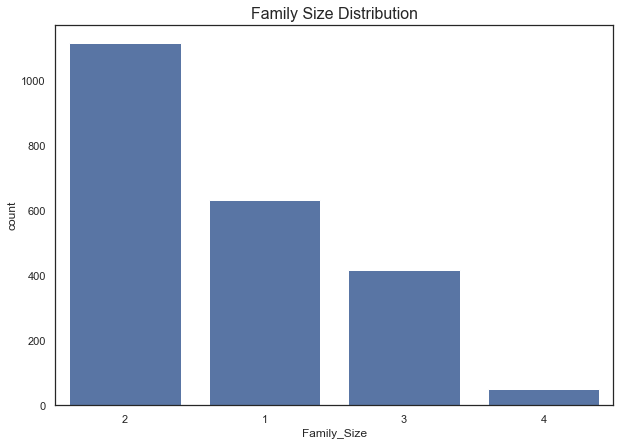

In [177]:
# family size dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['Family_Size'].value_counts().index
sns.countplot(df['Family_Size'], color=color, order=order)
plt.title('Family Size Distribution', fontsize=16)
plt.show();

<Figure size 720x504 with 0 Axes>

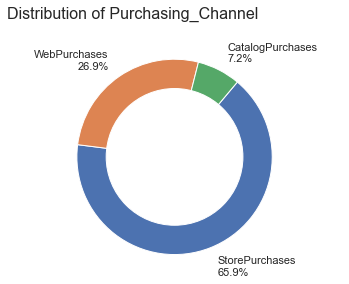

In [178]:
# Purchasing_Channel distribution
plt.figure(figsize=[10, 7])
counts = df['Purchasing_Channel'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Purchasing_Channel', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

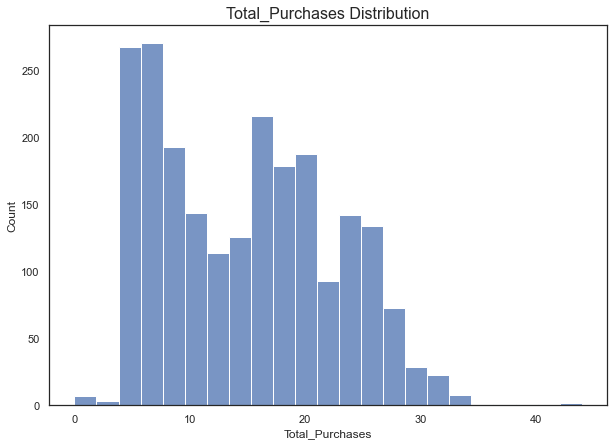

In [179]:
# total Total_Purchases
plt.figure(figsize=[10, 7])
sns.histplot(data=df, x='Total_Purchases')
plt.title('Total_Purchases Distribution', fontsize=16)
plt.show();

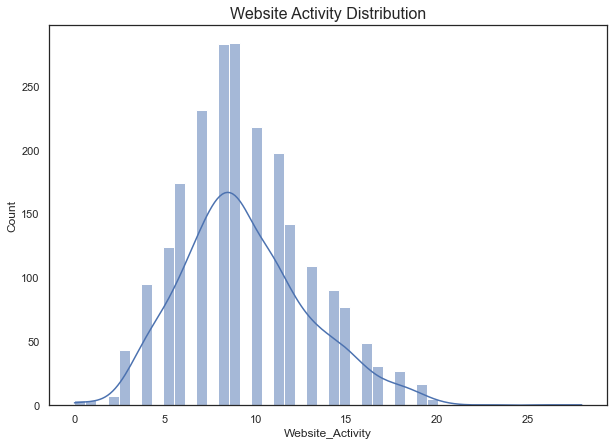

In [180]:
# Website_Activity dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
sns.histplot(df['Website_Activity'], color=color, kde=True)
plt.title('Website Activity Distribution', fontsize=16)
plt.show();

<Figure size 720x504 with 0 Axes>

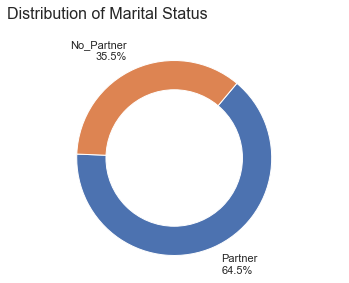

In [181]:
# Marital_Status_New distribution
plt.figure(figsize=[10, 7])
counts = df['Marital_Status_New'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Marital Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

<Figure size 720x504 with 0 Axes>

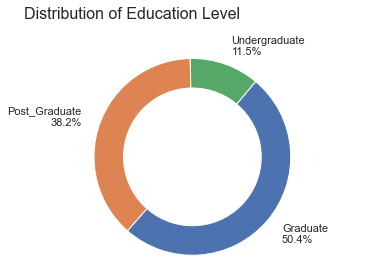

In [182]:
# Education_Level distribution
plt.figure(figsize=[10, 7])
counts = df['Education_Level'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Education Level', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

<Figure size 720x504 with 0 Axes>

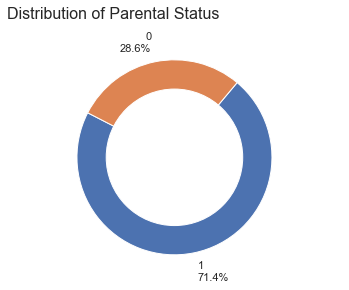

In [183]:
# Parent distribution
plt.figure(figsize=[10, 7])
counts = df['Parent'].value_counts()
labels = [f"{attendance}\n{count / len(df) * 100:.1f}%" for attendance, count in counts.items()]

fig, ax = plt.subplots()
ax.pie(counts, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('Distribution of Parental Status', fontsize=16, loc='left', pad=30)
ax.axis('equal')
plt.show();

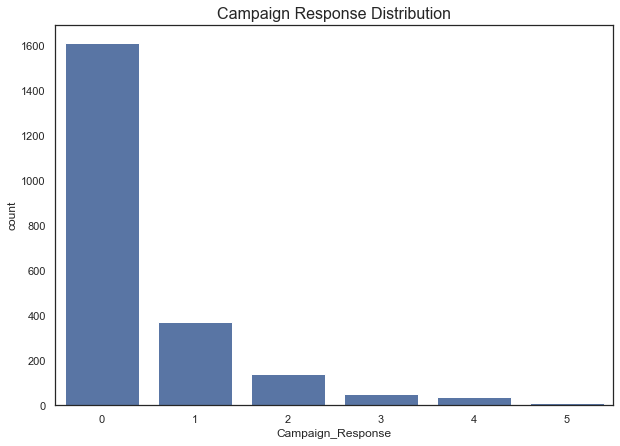

In [184]:
# Campaign_Response dist
plt.figure(figsize=[10, 7])
color = sns.color_palette()[0]
order = df['Campaign_Response'].value_counts().index
sns.countplot(df['Campaign_Response'], color=color, order=order)
plt.title('Campaign Response Distribution', fontsize=16)
plt.show();

## Data Preprocessing and Scaling

we can see there are some outliers in the `Age` and `Income` columns

In [185]:
def print_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = column[(column < lower_fence) | (column > upper_fence)]
    
    print(f"Outliers in {column.name}:")
    print(outliers)

print_outliers(df['Age'])
print_outliers(df['Income'])

Outliers in Age:
192    123
239    130
339    124
Name: Age, dtype: int64
Outliers in Income:
164     157243.0
617     162397.0
655     153924.0
687     160803.0
1300    157733.0
1653    157146.0
2132    156924.0
2233    666666.0
Name: Income, dtype: float64


In [186]:
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    no_outliers = column[(column >= lower_fence) & (column <= upper_fence)]
    return no_outliers

no_outliers_age = remove_outliers(df['Age'])
no_outliers_income = remove_outliers(df['Income'])
df_no = df[(df['Age'].isin(no_outliers_age)) & (df['Income'].isin(no_outliers_income))]
df_no.sample(10)

,ID,Income,Recency,Complain,Age,Total_Spending,Family_Size,Total_Acceptance,days_of_enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent
659,6940,46734.0,86,0,57,223,4,1,3515,WebPurchases,12,9,1,No_Partner,Post_Graduate,1
786,1135,17144.0,96,0,63,47,3,0,3398,StorePurchases,12,10,0,Partner,Post_Graduate,1
1555,7791,37054.0,89,0,56,25,3,0,3551,StorePurchases,6,8,0,Partner,Post_Graduate,1
124,7215,101970.0,69,0,40,1135,1,3,3472,StorePurchases,27,8,4,No_Partner,Graduate,0
310,10032,12571.0,86,0,47,53,2,0,3426,WebPurchases,11,9,0,No_Partner,Graduate,1
1093,9080,38578.0,2,0,51,73,3,0,3636,WebPurchases,9,11,0,No_Partner,Post_Graduate,1
982,6634,33462.0,78,0,44,54,2,0,3620,StorePurchases,6,9,0,No_Partner,Post_Graduate,1
1571,9916,38998.0,92,1,69,54,3,0,4104,StorePurchases,8,10,0,Partner,Graduate,1
1481,7787,62807.0,83,0,63,819,2,0,3931,StorePurchases,23,10,0,Partner,Graduate,1
752,7094,58330.0,87,0,48,1064,2,0,3450,StorePurchases,24,10,0,No_Partner,Graduate,1


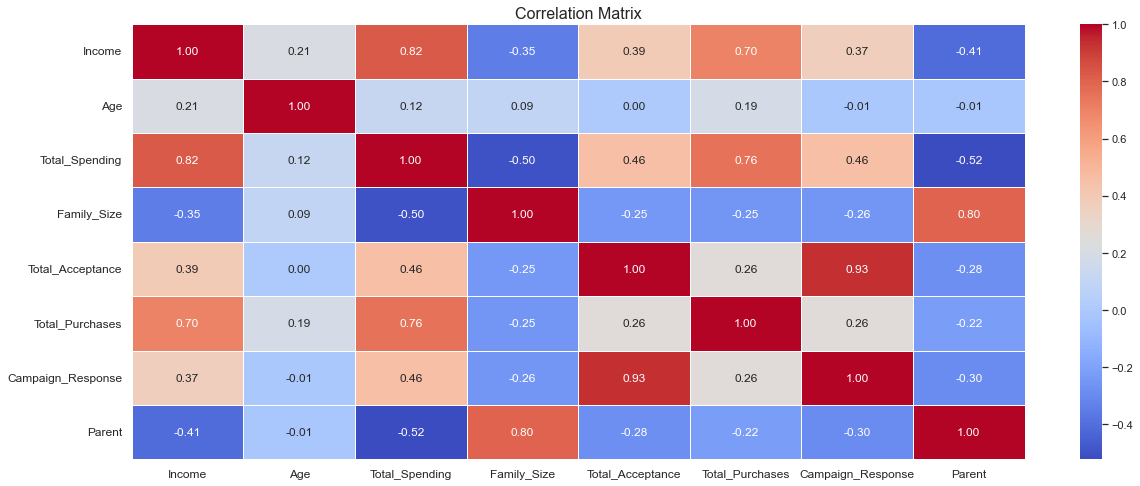

In [187]:
# now lets check item correlation after removing outliers
corr = df_no[['Income', 'Age', 'Total_Spending', 'Family_Size', 'Total_Acceptance', 'Total_Purchases', 'Campaign_Response', 'Parent']].corr()
plt.figure(figsize=[20, 8])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show();

In [188]:
# apply label encoding and scale the dataset
le = LabelEncoder()
cat_cols = df_no.select_dtypes(include='object').columns
for col in cat_cols:
    df_no[col] = le.fit_transform(df_no[col])
    
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no)
df_scaled = pd.DataFrame(scaled_data, columns=df_no.columns)
df_scaled.head()

,ID,Income,Recency,Complain,Age,Total_Spending,Family_Size,Total_Acceptance,days_of_enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent
0,-0.018923,0.314651,0.310830,-0.095673,1.017189,1.679323,-1.266589,-0.439991,1.974128,-2.189411,1.328161,1.573210,0.614920,-1.347625,-0.892338,-1.58466
1,-1.050705,-0.254877,-0.380600,-0.095673,1.273530,-0.963897,1.403420,-0.439991,-1.664957,-0.362140,-1.167390,-0.972274,-0.503808,-1.347625,-0.892338,0.63105
2,-0.444880,0.965354,-0.795458,-0.095673,0.333612,0.281242,-1.266589,-0.439991,-0.172330,-0.362140,0.802782,0.724716,-0.503808,0.742046,-0.892338,-1.58466
3,0.183737,-1.206087,-0.795458,-0.095673,-1.289883,-0.920675,0.068415,-0.439991,-1.923048,-0.362140,-0.904700,-0.406610,-0.503808,0.742046,-0.892338,0.63105
4,-0.080522,0.322136,1.555404,-0.095673,-1.033542,-0.307248,0.068415,-0.439991,-0.821859,-0.362140,0.540092,0.159053,-0.503808,0.742046,0.571654,0.63105


In [189]:
# original_mappings = {}
# for column in cat_cols:
#     le = LabelEncoder()
#     encoded_column = le.fit_transform(df[column])
#     original_mappings[column] = dict(zip(le.classes_, le.transform(le.classes_)))
# for column, mapping in original_mappings.items():
#     print(f"Original mapping for column '{column}':")
#     print('\n', mapping, '\n')

## Dimensionality Reduction Using Principal Component Analysis
Dimensionality reduction is a technique used to reduce the number of features or variables in a dataset while preserving the essential information. It aims to simplify the data representation by identifying and capturing the most important patterns and relationships in the data. <br>
it is worth noting that in this dataset, there are highly correlated values among the features in the dataset. This high correlation can lead to multicollinearity issues, where the presence of redundant information can negatively affect the clustering algorithm's performance. <br><br>
One commonly used technique for dimensionality reduction is Principal Component Analysis (PCA), which transforms the original features into a new set of orthogonal variables called principal components. These components capture the maximum variance in the data, allowing for a lower-dimensional representation. Here, I used PCA not only for dimensionality reduction but also to mitigate the impact of highly correlated features, resulting in a more robust and accurate clustering analysis.

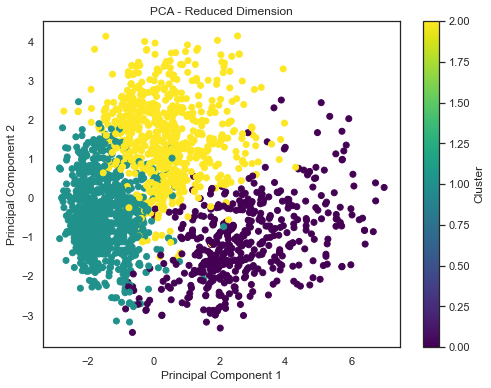

In [406]:
# copy the dataset into a new variable X
X = df_scaled.copy()

# Apply PCA for dimensionality reduction. Keep 2 componenets
pca = PCA(n_components=2)

#Fit the model with X and apply the dimensionality reduction on X.
X_pca = pca.fit_transform(X)

# Plot the reduced dimension using PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Dimension')
plt.colorbar(label='Cluster')
plt.show()

After performing dimensionality reduction and visualizing the reduced dimension, the next step is to apply the Agglomerative Clustering algorithm to cluster the data. 

## Agglomerative Clustering

Now that I have reduced the attributes to two dimensions, I will be performing segmentation by clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Cluster Counts:
1    1116
2     592
0     497
Name: Cluster, dtype: int64


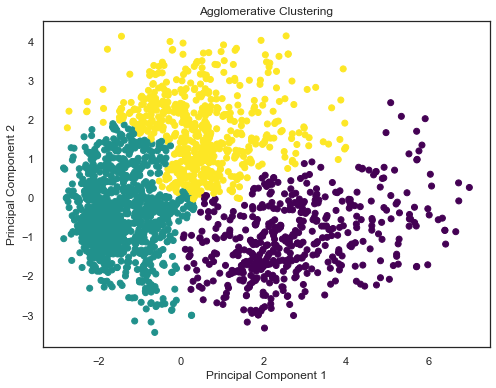

In [407]:
# Fit Agglomerative Clustering model
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering.fit_predict(X_pca)

# Obtain cluster labels
cluster_labels = clustering.labels_

# Add the cluster labels to the original dataframe
df_clustered = df_scaled.copy()
df_clustered['Cluster'] = cluster_labels

# Analyze Clusters
cluster_counts = df_clustered['Cluster'].value_counts()
print('Cluster Counts:')
print(cluster_counts)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Distribution of Clusters

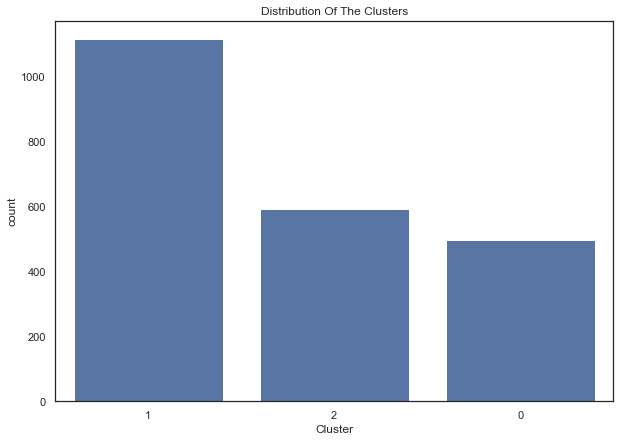

In [408]:
plt.figure(figsize=[10, 7])
order = df_clustered['Cluster'].value_counts().index
color = sns.color_palette()[0]
pl = sns.countplot(x=df_clustered["Cluster"], color=color, order=order)
pl.set_title("Distribution Of The Clusters")
plt.show()

Evaluating the quality and validity of the clustering results. using the silhouette score metric.

In [409]:
# Evaluate clustering results
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

# Calculate cluster means
cluster_means = df_clustered.groupby('Cluster').mean()
print('\nCluster Means:')
display(cluster_means)

Silhouette Score: 0.452

Cluster Means:


,ID,Income,Recency,Complain,Age,Total_Spending,Family_Size,Total_Acceptance,days_of_enrollment,Purchasing_Channel,Total_Purchases,Website_Activity,Campaign_Response,Marital_Status_New,Education_Level,Parent
Cluster,,,,,,,,,,,,,,,,
0,0.012233,1.104711,0.015268,-0.032003,0.060938,1.207853,-1.175261,0.698718,-0.101333,-0.755536,0.640517,-0.668386,0.702707,-0.119890,-0.076391,-1.437540
1,0.020725,-0.707128,-0.017661,0.008294,-0.172256,-0.779821,0.409344,-0.349106,-0.187867,0.009537,-0.778299,-0.263927,-0.352439,0.030510,0.079721,0.420598
2,-0.049340,0.405596,0.020476,0.011232,0.273568,0.456042,0.214995,0.071519,0.439227,0.616315,0.929467,1.058667,0.074453,0.043136,-0.086153,0.413971


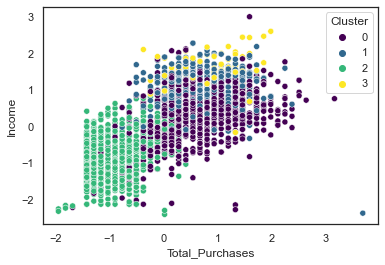

In [400]:
sns.scatterplot(data=df_clustered, x='Total_Purchases', y='Income', hue='Cluster', palette='viridis')
plt.show();

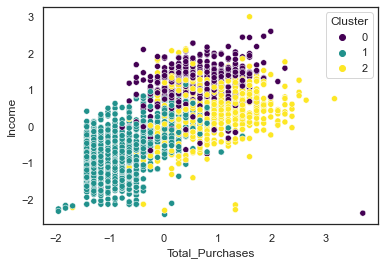

In [391]:
sns.scatterplot(data=df_clustered, x='Total_Purchases', y='Income', hue='Cluster', palette='viridis')
plt.show();